### LORENZ TEST

In [1]:
import utils
import importlib

importlib.reload(utils)

lorenz, lorenz_time = utils.time_dynamic_system(
    epoch=6000, delta_t=0.02, system=utils.dynamic_lorenz
)
lorenz_x, lorenz_y, lorenz_z = lorenz

In [21]:
import model

importlib.reload(model)

RP_lorenz = model.reservoirModel("lorenz.config")
print("W_out before_training:\n", RP_lorenz.W_out)
RP_lorenz.training()
print("W_out after_training:\n", RP_lorenz.W_out)

output_lorenz, _ = RP_lorenz.run_by_self()

forced_output_lorenz, _ = RP_lorenz.run_with_input()

W_out before_training:
 tensor([[0.8777, 0.6905, 0.1965],
        [0.6527, 0.7989, 0.4158],
        [0.2049, 0.4918, 0.6194],
        [0.5853, 0.5336, 0.2293],
        [0.4865, 0.9503, 0.0017],
        [0.7645, 0.9518, 0.2669],
        [0.0455, 0.4862, 0.6605],
        [0.5788, 0.3185, 0.0892],
        [0.8838, 0.1035, 1.0000],
        [0.8464, 0.0988, 0.3388],
        [0.6130, 0.8826, 0.0278],
        [0.5937, 0.8550, 0.4965],
        [0.6823, 0.7273, 0.0767],
        [0.5276, 0.9653, 0.7496],
        [0.7513, 0.7655, 0.3673],
        [0.0787, 0.7058, 0.3555],
        [0.2418, 0.1352, 0.9062],
        [0.0085, 0.2619, 0.0433],
        [0.4701, 0.9600, 0.8637],
        [0.7265, 0.5234, 0.7188],
        [0.8719, 0.6356, 0.3744],
        [0.9049, 0.1829, 0.5964],
        [0.1092, 0.9537, 0.6696],
        [0.9850, 0.6133, 0.4023],
        [0.5125, 0.1710, 0.2404],
        [0.3580, 0.8613, 0.0096],
        [0.1441, 0.3367, 0.8323],
        [0.4275, 0.8540, 0.8567],
        [0.6518, 0.8245,

/home/bfish/projects/reservoir2/model.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reservoir_state,sample,output = self.forward(self.states[-1],torch.tensor(self.system_input[i]))
/home/bfish/projects/reservoir2/model.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir2/model.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir2/model.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceT

W_out after_training:
 tensor([[-1.0665e-01,  1.2877e-02, -8.3223e-02],
        [ 2.1630e-02, -7.8605e-02,  5.4329e-01],
        [ 9.2066e-02, -5.0310e-02, -9.3205e-02],
        [ 2.5551e-01,  1.5921e-02,  6.6473e-01],
        [ 6.7955e-02,  2.0543e-01,  2.7818e-02],
        [ 7.1255e-02,  6.3877e-02,  4.0944e-01],
        [-1.9261e-01, -2.6872e-01,  1.4794e-02],
        [-3.3007e-01, -1.9795e-01,  7.6063e-01],
        [-1.0427e-01, -2.0756e-01,  4.6278e-02],
        [ 7.9247e-01,  1.2691e+00,  7.7460e-01],
        [ 9.7069e-02,  8.9775e-02,  1.0572e-01],
        [-3.1221e-01, -2.4172e-02,  5.3724e-01],
        [-2.0030e-01, -1.9558e-01, -1.4896e-01],
        [-3.4039e-01, -2.5146e-01,  5.3372e-01],
        [ 1.9449e-01,  2.8739e-01, -4.2916e-02],
        [ 1.4949e-01,  1.4930e-01,  8.0093e-01],
        [ 2.7647e-01,  1.7942e-01,  1.0387e-01],
        [ 1.2454e-01, -1.2065e-01,  9.4723e-01],
        [ 1.3786e-01,  1.7366e-01,  4.9198e-02],
        [-3.0063e-01, -6.4614e-01,  2.1393e-01

/home/bfish/projects/reservoir2/model.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state,sample, prediction = self.forward(run_states[-1],torch.tensor(self.output[-1]))


[25.         24.92011453 24.09104768 ... -0.93189154 -0.97091875
 -1.04204917] tensor([31.3484, 29.0943, 27.8510], dtype=torch.float64)


/tmp/ipykernel_27319/1585922758.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


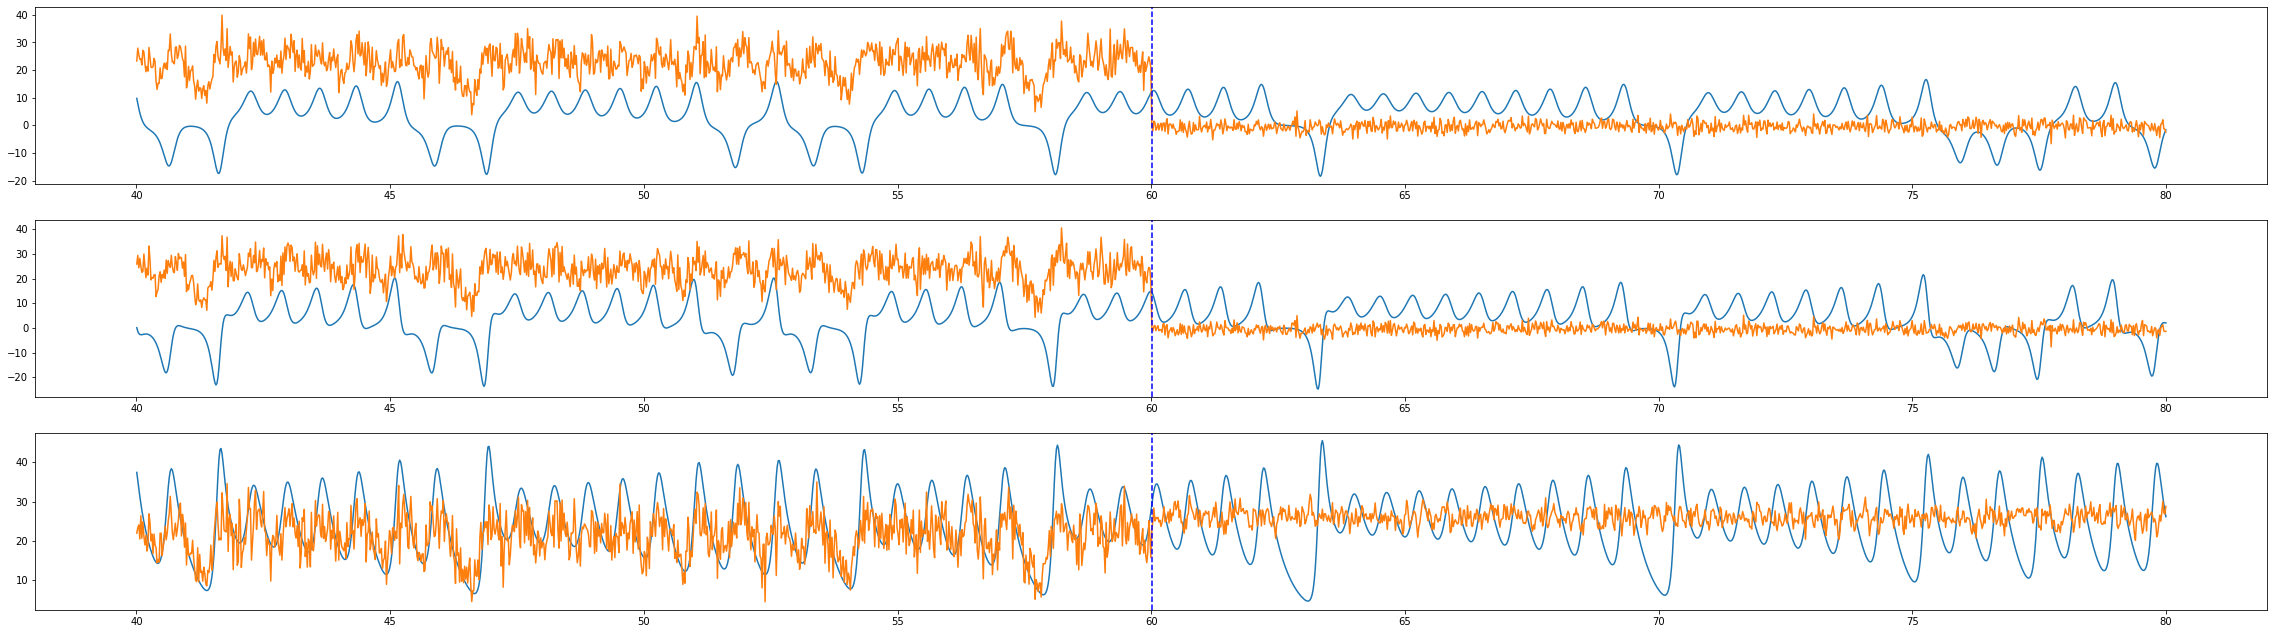

In [22]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
print(lorenz[0], output_lorenz[0])
# utils.plot_time_sequence(RP_lorenz.training_time,RP_lorenz.training_time+1000,RP_lorenz.training_time,RP_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RP_lorenz.run_time * RP_lorenz.d_t, RP_lorenz.run_time)
utils.plot_time_sequence(
    RP_lorenz.training_time - 1000,
    RP_lorenz.training_time + 1000,
    RP_lorenz.training_time,
    RP_lorenz.f,
    torch.tensor(output_lorenz),
    torch.tensor(lorenz).T,
    lorenz_time,
    3,
)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

### MACKEY-GLASS TEST

In [16]:
import utils

importlib.reload(utils)

sequence, time = utils.discrete_mackey_glass(epoch=6000)
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
plt.plot(time, sequence[0])

/home/bfish/projects/reservoir2/utils.py:62: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = A * x[i] + B * (x[i - n] / (1 + x[i - n] ** c) +


In [17]:
import model
import importlib

importlib.reload(model)

RP_mg = model.reservoirModel("mackey_glass.config")
print("W_out before_training:\n", RP_mg.W_out)
RP_mg.training()
print("W_out after_training:\n", RP_mg.W_out)

output_mg, _ = RP_mg.run_by_self()

forced_output_mg, _ = RP_mg.run_with_input()

W_out before_training:
 tensor([[4.4711e-01],
        [1.2543e-02],
        [9.1064e-02],
        [8.8068e-01],
        [9.6022e-01],
        [5.5601e-01],
        [4.8660e-01],
        [4.7790e-01],
        [6.5428e-01],
        [3.8725e-01],
        [2.9667e-01],
        [9.1954e-01],
        [5.4012e-01],
        [3.1074e-01],
        [4.2668e-01],
        [9.1945e-01],
        [1.6776e-01],
        [5.2501e-01],
        [7.5513e-01],
        [6.2831e-01],
        [6.6931e-01],
        [5.6457e-01],
        [6.9258e-01],
        [7.3997e-01],
        [6.5889e-01],
        [4.2543e-01],
        [5.3724e-01],
        [1.8999e-01],
        [5.7656e-01],
        [3.3380e-02],
        [7.1231e-02],
        [1.3902e-01],
        [5.3805e-01],
        [2.6847e-01],
        [7.0897e-02],
        [8.1898e-01],
        [2.3286e-01],
        [9.5314e-01],
        [5.3761e-01],
        [6.4477e-01],
        [6.2959e-01],
        [6.2721e-01],
        [4.4211e-01],
        [4.7449e-01],
        

/home/bfish/projects/reservoir2/model.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoir2/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))
/home/bfish/projects/reservoir2/model.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])


W_out after_training:
 tensor([[ 8.9164e-03],
        [ 8.7234e-03],
        [ 3.1311e-04],
        [-2.8431e-02],
        [ 1.6620e-02],
        [ 7.7549e-03],
        [-6.8477e-03],
        [ 3.2489e-03],
        [ 1.0893e-02],
        [-3.1369e-03],
        [-4.3754e-03],
        [ 1.0754e-02],
        [ 1.7824e-02],
        [-8.8303e-03],
        [ 3.2482e-03],
        [ 6.5611e-03],
        [ 1.1385e-02],
        [-1.7176e-02],
        [-2.4858e-02],
        [-5.9998e-03],
        [ 1.3795e-02],
        [-9.5282e-03],
        [ 6.3913e-03],
        [-1.3362e-02],
        [ 6.3809e-03],
        [-1.6324e-02],
        [-3.6058e-03],
        [-1.1830e-02],
        [ 1.4179e-02],
        [ 1.3697e-02],
        [-1.0412e-02],
        [ 1.0415e-02],
        [ 1.7010e-02],
        [ 1.2334e-02],
        [ 2.1422e-02],
        [-1.7832e-02],
        [-1.1689e-02],
        [ 1.3142e-02],
        [ 2.0564e-02],
        [-2.0514e-02],
        [-8.8251e-03],
        [-1.5923e-02],
        [ 6

/home/bfish/projects/reservoir2/model.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.output[-1])
/home/bfish/projects/reservoir2/model.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(torch.tensor(np.dot(self.W_reservoir,prev))+torch.tensor(feed_to_reservoir))))


In [18]:
import torch

importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RP_mg.training_time - 2000,
    RP_mg.training_time + 2000,
    RP_mg.training_time,
    RP_mg.f,
    torch.tensor(output_mg),
    torch.tensor(sequence).T,
    time,
    1,
)
# plotting a clip from output generated by continued input into trained model
utils.plot_time_sequence(
    RP_mg.training_time - 2000,
    RP_mg.training_time + 2000,
    RP_mg.training_time,
    RP_mg.f,
    torch.tensor(forced_output_mg),
    torch.tensor(sequence).T,
    time,
    1,
)


# utils.plot_time_sequence(0,RP.run_time,RP.f,p,s,time,1)

/tmp/ipykernel_82941/625288792.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  utils.plot_time_sequence(RP_mg.training_time-2000,RP_mg.training_time+2000,RP_mg.training_time,RP_mg.f,torch.tensor(output_mg),torch.tensor(sequence).T,time,1)


/tmp/ipykernel_82941/625288792.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  utils.plot_time_sequence(RP_mg.training_time-2000,RP_mg.training_time+2000,RP_mg.training_time,RP_mg.f,torch.tensor(forced_output_mg),torch.tensor(sequence).T,time,1)
